In [1]:
# Getting the Libraries I Need
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Model Specific Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Turn Off Pink Boxes 
import warnings
warnings.filterwarnings("ignore")

# Import my own "wrangle" Module 
import wrangle

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# Centers my charts in the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<img src="Images/telco.jpg" alt="Telco Logo" title="Telco Logo" width="300" height="300" align="center"/>
    

<div align="center">

# Final Report title here

<div align="center">

### by Jeanette Schulz 2021-11-29

<hr style="border:2px solid blue"> </hr>



# Goals
The goal of this report is to reduce churn in Telco. This project aims to discover features that may be related to churn, and use these discoveries to create a machine learning classification model that can predict if a customer is about to churn or not.

<hr style="border:2px solid blue"> </hr>

# Planning
1. Setup my repository environment (.gitignore, README.md)
2. Import and test my wrangle functions
3. Define an test at least two hypothesis’s 
4. Train and Evalutate three different classification models.
5. Create a csv file with predictions, from the model that perfoms the best
6. Report my conclusions and next steps in a presentation.

<hr style="border:2px solid blue"> </hr>

# Executive Summary
My Random Forest Model Precision was 90%, beating my Baseline accuracy of 73%.

The data suggest monthly costs are too high, especially for month-to-month customers whom have Fiber Optic Internet. Lowering the cost or suggesting customers switch to DSL Internet would lower churn rate.


<hr style="border:2px solid blue"> </hr>

# Acquiring the Data
To acquire the Telco data, I used the telco_db in the Codeup SQL server, and selected all columns from the passengers table. 
> SELECT * FROM customers  
> JOIN contract_types USING(contract_type_id)   
> JOIN internet_service_types USING(internet_service_type_id)  
> JOIN payment_types USING(payment_type_id)  
 

In [2]:
telco_df = wrangle.get_telco_data()
telco_df.head()

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  \
0  Female               0     Yes        Yes      65           Yes   
1    Male               0      No         No      54            No   
2  Female               0      No         No      56            No   
3    Male               0     Yes        Yes      20            No   
4    Male               0     Yes         No      72           Yes   

     multiple_lines online_security online_backup device_protection  \
0               Yes             Yes           Yes               Yes   
1  No phone service             Yes            No                No   
2  No phone service             Yes           Yes               Yes   
3  No phone service             Yes            No               Yes   
4               Yes              No           Yes               Yes   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes              Yes               Yes   
1          Yes          Yes               No                No   
2          Yes           No               No                No   
3          Yes           No               No               Yes   
4          Yes          Yes              Yes               Yes   

   monthly_charges total_charges churn contract_type internet_service_type  \
0            90.45        5957.9    No      Two year                   DSL   
1            45.20       2460.55    No      Two year                   DSL   
2            45.05        2560.1    No      Two year                   DSL   
3            39.40         825.4    No      Two year                   DSL   
4            85.15        6316.2    No      Two year                   DSL   

                payment_type  
0               Mailed check  
1    Credit card (automatic)  
2  Bank transfer (automatic)  
3    Credit card (automatic)  
4  Bank transfer (automatic)

In [3]:
telco_df.shape

(7043, 24)

<hr style="border:2px solid blue"> </hr>

# Preparing the Data


To clean the data, I did the following:

1. Convert the 11 unassigned Total Charges to zero:  
Total charges are the cumulative sum of monthly charges. Since these Telco customers had not maid it through thier first month, I decided it was best to make these 11 unassigned Total Charges zero.


2. Convert all Total Charges to a float dtype. 


3. Create dummy variables for all categorical columns, then concatenate them onto the dataframe.</b> 


4. Drop all the categorical columns.  
I also decided to drop customer_id as I decided I would not need it for any of my future calculations.


5. Rename all the columns to code-friendly names.  

 


In [4]:
telco = wrangle.clean_telco(wrangle.get_telco_data())
telco.head()

senior_citizen  tenure  monthly_charges  total_charges  is_male  \
0               0      65            90.45        5957.90        0   
1               0      54            45.20        2460.55        1   
2               0      56            45.05        2560.10        0   
3               0      20            39.40         825.40        1   
4               0      72            85.15        6316.20        1   

   has_partner  has_dependent  has_phone_service  has_paperless_billing  \
0            1              1                  1                      1   
1            0              0                  0                      0   
2            0              0                  0                      0   
3            1              1                  0                      1   
4            1              0                  1                      1   

   has_churned  multiple_lines_no_phone_service  has_multiple_lines  \
0            0                                0                   1   
1            0                                1                   0   
2            0                                1                   0   
3            0                                1                   0   
4            0                                0                   1   

   online_security_no_internet_service  has_online_security  \
0                                    0                    1   
1                                    0                    1   
2                                    0                    1   
3                                    0                    1   
4                                    0                    0   

   online_backup_no_internet_service  has_online_backup  \
0                                  0                  1   
1                                  0                  0   
2                                  0                  1   
3                                  0                  0   
4                                  0                  1   

   device_protection_no_internet_service  has_device_protection  \
0                                      0                      1   
1                                      0                      0   
2                                      0                      1   
3                                      0                      1   
4                                      0                      1   

   tech_support_no_internet_service  has_tech_support  \
0                                 0                 1   
1                                 0                 1   
2                                 0                 1   
3                                 0                 1   
4                                 0                 1   

   streaming_tv_no_internet_service  has_streaming_tv  \
0                                 0                 1   
1                                 0                 1   
2                                 0                 0   
3                                 0                 0   
4                                 0                 1   

   internet_service_type_DSL  internet_service_type_fiber_optic  \
0                          1                                  0   
1                          1                                  0   
2                          1                                  0   
3                          1                                  0   
4                          1                                  0   

   internet_service_type_None  payment_type_bank_transfer_A  \
0                           0                             0   
1                           0                             0   
2                           0                             1   
3                           0                             0   
4                           0                             1   

   payment_type_credit_card_A  payment_type_electronic_check_M  \
0                           0    

<hr style="border:2px solid blue"> </hr>

# Explore the Train dataset





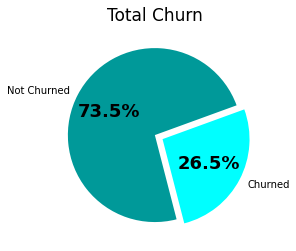

In [5]:
# Define my data and labels
data = [(telco.has_churned.value_counts())[0], (telco.has_churned.value_counts())[1]]
labels = ['Not Churned', 'Churned']
# Create the figures the Pie Chart will be in
fig1, ax1 = plt.subplots()
# Create the Pie Chart
_, _, autopcts = ax1.pie(data,explode= (0, 0.1), labels=labels, autopct='%1.1f%%', shadow=False, startangle=20, colors=('#009999', '#00FFFF'))
# Font Settings
plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':18})
# Title settings
ax1.set_title('Total Churn', fontdict={'fontsize': 17})
plt.show()

Questions that you want to answer:
1. Are customers with Fiber internet more likely to churn than customers with DSL?
2. Are customers who pay manually more likely to churn than customers who pay automatically?
3. Do customers who churn have a higher average monthly charge than those who don't?
4. Are customers with dependents/partners on thier contract more likely to churn than those without?

In [6]:
# Assuming a confidence level of 95% 
alpha = 0.05

1. Is there a relationship between having Fiber Internet and churning?
- H<sub>0</sub>: There is no relationship between customers with Fiber Internet and customers who churn
- H<sub>a</sub>: There is an relationship between customers with Fiber Internet and customers who churn


In [7]:
fiber_churn_observed = pd.crosstab(telco.internet_service_type_fiber_optic, telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(fiber_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: There is an relationship between customers who have Fiber Internet, and those who have churned 
>
>Takeaway: Customers with Fiber internet might be a good focus.

This can also be seen with this chart, comparing churn of internet service:

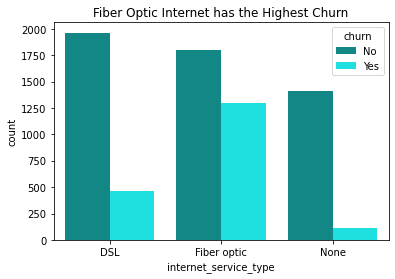

In [8]:
sns.countplot(x='internet_service_type', hue='churn', data=telco_df, palette=[ '#009999','#00FFFF'])
plt.title('Fiber Optic Internet has the Highest Churn')
plt.show();

2. Is there a relationship between manual pay and churning?

A Chi<sup>2</sup> test would be best for this because it compares two categorical columns.
- H<sub>0</sub>: There is no relationship between customers manual pay and churning.
- H<sub>a</sub>: There is a relationship between customers manual pay and churning.


In [9]:
# This is a Chi2 test
manual_churn_observed = pd.crosstab((telco.payment_type_electronic_check_M + telco.payment_type_mailed_check_M), telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(manual_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: There is an relationship between customers who pay Manually, and those who have churned. 
>
>Takeaway: Customers with Manual payment types might be a good focus.

This chart shows customers who don't use automatic pay, churn more:

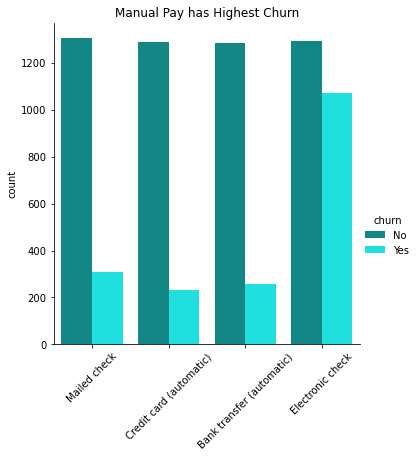

In [10]:
# looking at churn by payment type
sns.catplot(x='payment_type', hue='churn', data=telco_df, orient='horizontal', kind= "count", palette=[ '#009999','#00FFFF'])
plt.xticks(rotation=45)
plt.title("Manual Pay has Highest Churn")
plt.xlabel(' ')
plt.show();

3. Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?
- H<sub>0</sub>: Mean of monthly charges of churned customers <= mean of monthly charges of all customers

- H<sub>a</sub>: Mean of monthly charges of churned customers > mean of monthly charges of all customers 



In [11]:
# This is a One-Tailed T-Test
churn_sample = telco[telco.has_churned == 1].monthly_charges
overall_mean = telco.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

if p/2 < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: Customers who churn are charged more than the overall average monthly charges.
>
>Takeaway: Lowering these high monthly charges should probably be a part of my solution.

This chart shows customers who have churned, according to thier monthly charges:

Text(0.5, 0, 'Monthly Charges (USD)')

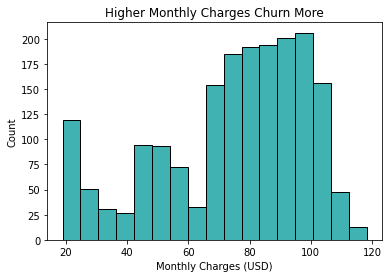

In [12]:
sns.histplot(x= telco_df[telco_df.churn== 'Yes'].monthly_charges, color=["#009999"])
plt.title('Higher Monthly Charges Churn More')
plt.xlabel('Monthly Charges (USD)')

4. Is there a relationship between household size and churn?

- H<sub>0</sub>: There is no relationship between household size and churning.

- H<sub>a</sub>: There is a relationship between household size and churning.

In [13]:
# Chi2 test
size_churn_observed = pd.crosstab((telco.has_partner + telco.has_dependent), telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(size_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


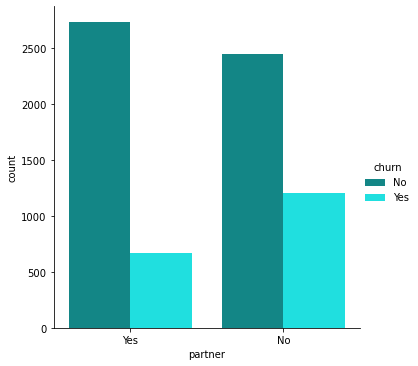

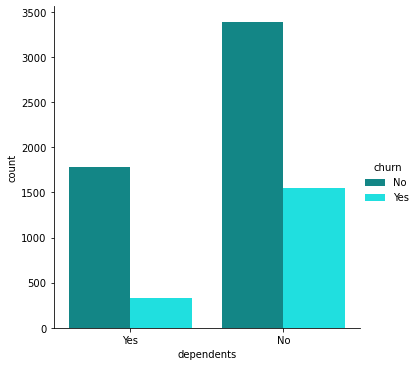

In [14]:
f, axes = plt.subplots(1, 2)
sns.catplot(x='partner', hue='churn', data= telco_df,  kind= "count", palette=[ '#009999','#00FFFF'], ax= axes[1])
sns.catplot(x='dependents', hue='churn', data= telco_df, kind= "count", palette=[ '#009999','#00FFFF'], ax = axes[1])
plt.close(1)


>Conclusion: There is a relationship between household size and churning.
>
>Takeaway: I know that there is a relationship, but I could certainly dive further into the details. For example, do customers with dependents churn more than customers without?



<hr style="border:2px solid blue"> </hr>

# Model and Evaluation



In [15]:
# Time to split my data for proper modeling:
train, validate, test = wrangle.split_this_data(telco)

## Baseline Model

In [16]:
# Finding the most common label in my target variable has_churn:
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

In [17]:
# I will use zero as my baseline, since it was my most common label in has_churn
# Where zero represents False, "Did not churn"
train['baseline_prediction'] = 0

# Finding my baseline percentage:
baseline_accuracy = (train.has_churned == train.baseline_prediction).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

# Removing the new column since I don't need it once I have my accuracy printed:
train = train.drop(['baseline_prediction'],1)

baseline accuracy: 73.47%


#### I want to find a model that does better than my Baseline of 73%

In [18]:
# Assigning my features to X, and target variable to y, for each split dataframe

X_train = train.drop(columns=['has_churned'])
y_train = train.has_churned

X_validate = validate.drop(columns=['has_churned'])
y_validate = validate.has_churned

X_test = test.drop(columns=['has_churned'])
y_test = test.has_churned

## Decision Tree

In [19]:
# Create the Decision Tree object with desired hyper-parameters.
decision_tree_model = DecisionTreeClassifier(max_depth= 3, random_state= 42)

# Fit the model
decision_tree_model = decision_tree_model.fit(X_train, y_train)

# Have the model make predictions
decision_tree_predictions = decision_tree_model.predict(X_train)

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, decision_tree_predictions)[0][0]
FP = confusion_matrix(y_train, decision_tree_predictions)[0][1]
FN = confusion_matrix(y_train, decision_tree_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Decision Tree Model:\nDecision Tree on Training: {:.2f}%'
      .format((decision_tree_model.score(X_train, y_train)*100)))
print('Decision Tree on Validate: {:.2f}%'
      .format((decision_tree_model.score(X_validate, y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((decision_tree_model.score(X_train, y_train) - baseline_accuracy)*100))

print("\nDecision Tree Recall:", round(recall*100, 2) , "%")
print("Decision Tree Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Decision Tree Model:
Decision Tree on Training: 79.43%
Decision Tree on Validate: 78.65%
Percent Difference from Baseline: 5.96%

Decision Tree Recall: 80.68 %
Decision Tree Precision: 94.68 %


## Random Forest

In [20]:
# Train the Model
random_forest_model = RandomForestClassifier(min_samples_leaf= 1, max_depth= 10, random_state= 42)

# Fit the model
random_forest_model = random_forest_model.fit(X_train, y_train)

# Make Predictions
random_forest_predictions = random_forest_model.predict(X_train)

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, random_forest_predictions)[0][0]
FP = confusion_matrix(y_train, random_forest_predictions)[0][1]
FN = confusion_matrix(y_train, random_forest_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Random Forest Model:\nRandom Forest on Training: {:.2f}%'
      .format((random_forest_model.score(X_train, y_train)*100)))
print('Random Forest on Validate: {:.2f}%'
      .format((random_forest_model.score(X_validate, y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((random_forest_model.score(X_train, y_train) - baseline_accuracy)*100))

print("\nRandom Forest Recall:", round(recall*100, 2) , "%")
print("Random Forest Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Random Forest Model:
Random Forest on Training: 89.20%
Random Forest on Validate: 81.37%
Percent Difference from Baseline: 15.72%

Random Forest Recall: 90.31 %
Random Forest Precision: 95.55 %


## Logistic Regression

In [21]:
# Create the logistic regression
logistic_regression_model = LogisticRegression(random_state= 42)

# specify the features to use
features = ["internet_service_type_fiber_optic", "has_partner", "total_charges", "has_phone_service", "has_dependent"]

# Fit a model using only these specified features
logistic_regression_model.fit(X_train[features], y_train)

lr_predictions = logistic_regression_model.predict(X_train[features])

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, lr_predictions)[0][0]
FP = confusion_matrix(y_train, lr_predictions)[0][1]
FN = confusion_matrix(y_train, lr_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Logistic Regression Model:\nLogistic Regression on Training: {:.2f}%'
      .format((logistic_regression_model.score(X_train[features], y_train)*100)))
print('Logistic Regression on Validate: {:.2f}%'
      .format((logistic_regression_model.score(X_validate[features], y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((logistic_regression_model.score(X_train[features], y_train) - baseline_accuracy)*100))

print("\nLogistic Regression Recall:", round(recall*100, 2) , "%")
print("Logistic Regression Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Logistic Regression Model:
Logistic Regression on Training: 78.87%
Logistic Regression on Validate: 78.00%
Percent Difference from Baseline: 5.40%

Logistic Regression Recall: 82.74 %
Logistic Regression Precision: 90.02 %


## Model Takeaways:
All models did better than the Baseline model.

### The Precision metric on my Random Forest model had the best preformance. 
- Validate Dataset Accuracy 81.20%, which is 7.9% higher than Baseline
- Precision Approximately 96%  

I will use this for my Test Dataset!

In [22]:
# Train the Model
random_forest_model = RandomForestClassifier(min_samples_leaf= 1, max_depth= 10, random_state= 42)

# Fit the model
random_forest_model = random_forest_model.fit(X_train, y_train)

# Make Predictions from Test data
random_forest_predictions = random_forest_model.predict(X_test)

# Quick Calculations of Precision 
TP = confusion_matrix(y_test, random_forest_predictions)[0][0]
FP = confusion_matrix(y_test, random_forest_predictions)[0][1]
precision = TP/(TP+FP)

# Making things easy to read:
print('Random Forest Accuracy on Test data: {:.2f}%'
      .format((random_forest_model.score(X_test, y_test)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((random_forest_model.score(X_test, y_test) - baseline_accuracy)*100))
print("Random Forest Precision:", round(precision*100, 2) , "%")

Random Forest Accuracy on Test data: 78.07%
Percent Difference from Baseline: 4.60%
Random Forest Precision: 89.95 %


### Out of curiosity, let's see which features the model valued most...

In [23]:
print(random_forest_model.feature_importances_)

[0.01312977 0.1541367  0.11648778 0.14614777 0.01713467 0.01649381
 0.01551457 0.00411664 0.02170367 0.00422316 0.01553539 0.01071739
 0.02376386 0.01191535 0.01511344 0.00861381 0.01165896 0.0068925
 0.0238163  0.0079455  0.01608938 0.0205456  0.07105508 0.00638324
 0.00900003 0.00931185 0.05056382 0.00998295 0.09438851 0.01813048
 0.04948802]


#### The top 5 features valued most
1. total_charges 16.02%
2. tenure 13.86%
3. monthly_charges 12.99%
4. month_to_month_contract 10.31%
5. internet_service_type_fiber_optic 6.79% 


In [24]:
# Recombine train, validate, and test dataframes
telco = pd.concat([train, validate, test], axis=0)

# Create dataframe from probability of the Random Forest model, with the Test dataset
probability = pd.DataFrame(random_forest_model.predict_proba(X_test), columns=random_forest_model.classes_.tolist())

# Rename the probability columns
probability = probability.rename(columns={1:'Churn Probability'})

# Create a dataframe with the Predictions for whether a customer will churn or not
prediction_of_churn = pd.DataFrame({'Prediction' : random_forest_model.predict(X_test)})

# Grab my customer id's from original dataframe
customer_ids = telco_df['customer_id']

# Combine all the dataframes together
telco_churn_predictions = pd.concat([customer_ids, probability["Churn Probability"], prediction_of_churn], axis=1)

# Rename the customer id column for cleanliness
telco_churn_predictions = telco_churn_predictions.rename(columns={"customer_id":'Customer ID'})

# Change the Predictions from ones and zeros to words
telco_churn_predictions.Prediction = telco_churn_predictions.Prediction.replace({0: "no churn", 1: "CHURN"})

telco_churn_predictions.head(10)

Customer ID  Churn Probability Prediction
0  0016-QLJIS           0.001250   no churn
1  0017-DINOC           0.530154      CHURN
2  0019-GFNTW           0.000873   no churn
3  0056-EPFBG           0.033676   no churn
4  0078-XZMHT           0.288692   no churn
5  0114-IGABW           0.007318   no churn
6  0123-CRBRT           0.767492      CHURN
7  0191-EQUUH           0.303564   no churn
8  0214-JHPFW           0.080000   no churn
9  0229-LFJAF           0.190194   no churn

In [25]:
# Export prediction dataframe to a csv file
telco_churn_predictions.to_csv('predictions.csv')

<hr style="border:2px solid blue"> </hr>

# Summary

My Random Forest Model Precision was 90%, beating my Baseline accuracy of 73%.

If I had more time, I would have liked to have made some loops for testing a variety of hyperparameters for each model to increase accuracy. I would also focus futher on the features that the model found most valuble and see if there was more connections I could find to churn.

# Recommendations
The data suggest monthly costs are too high, especially for month-to-month customers whom have Fiber Optic Internet. Lowering the cost or suggesting customers switch to DSL Internet would lower churn rate.


# Thank You!